<a href="https://colab.research.google.com/github/Karen-Gas/gittest/blob/master/%E1%83%93%E1%83%90%E1%83%95%E1%83%90%E1%83%9A%E1%83%94%E1%83%91%E1%83%901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#ამოცანა 1
#შეატრიალეთ მასივი  ანუ პირველი ელემენტი უნდა გახდეს ბოლო, მეორე უნდა გახდეს ბოლოს წინა და ა.შ.
import numpy as np
from matplotlib import pyplot as plt 
mas = np.arange(101)
print(mas)
print("--"*35)
mas = mas[::-1]
print(mas)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
----------------------------------------------------------------------
[100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85  84  83
  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68  67  66  65
  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50  49  48  47
  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32  31  30  29
  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14  13  12  11
  10   9   8   7   6   5   4   3   2   1   0]


In [52]:
#საშუალო არითმეტიკული
mas = np.arange(100)
mas_mean = mas.mean()
mas_mean

49.5

In [53]:
# ვამოწმებ არის თუ არა ორი მასივი ერთნაირი
mas_1 = np.random.random(size=(1,3))
mas_2 = np.random.random(size=(1,3))
answer = np.equal(mas_1,mas_2)
answer

array([[False, False, False]])

In [54]:
def func(arg_1,arg_2):
  answer = np.equal(arg_1, arg_2)
  return answer

mas_1 = np.random.random(size=(7,7))
mas_2 = np.random.random(size=(7,7))
%time Z_loop = func(mas_1, mas_2)

CPU times: user 26 µs, sys: 4 µs, total: 30 µs
Wall time: 33.6 µs


1000


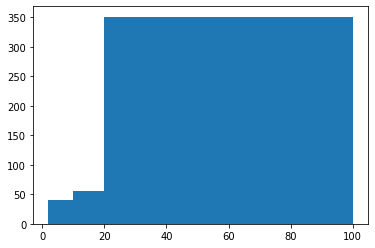

' ჩვენ მონაცემები დავვაჯგუფეთ 2დან 10, 10 დან 20  და 20 დან 100,\n2-10 არის 50 - 55 მონაცემი\n10-20 არის 60-65 მონაცემ\n20-100 არის 300 \n '

In [67]:

a = 6
b = 66
x = np.random.normal(a,b,1000)
print(len(x))
plt.hist(x, bins = [2, 10, 20, 100])
plt.show()

""" ჩვენ მონაცემები დავვაჯგუფეთ 2დან 10, 10 დან 20  და 20 დან 100,
2-10 არის 50 - 55 მონაცემი
10-20 არის 60-65 მონაცემ
დანარჩენი არის 20-100 ინტერვალში
 """
